Date and time  2021-08-12 10:39:04.021430
 
/home/selina/Documents/CometAnalysis/notebooks


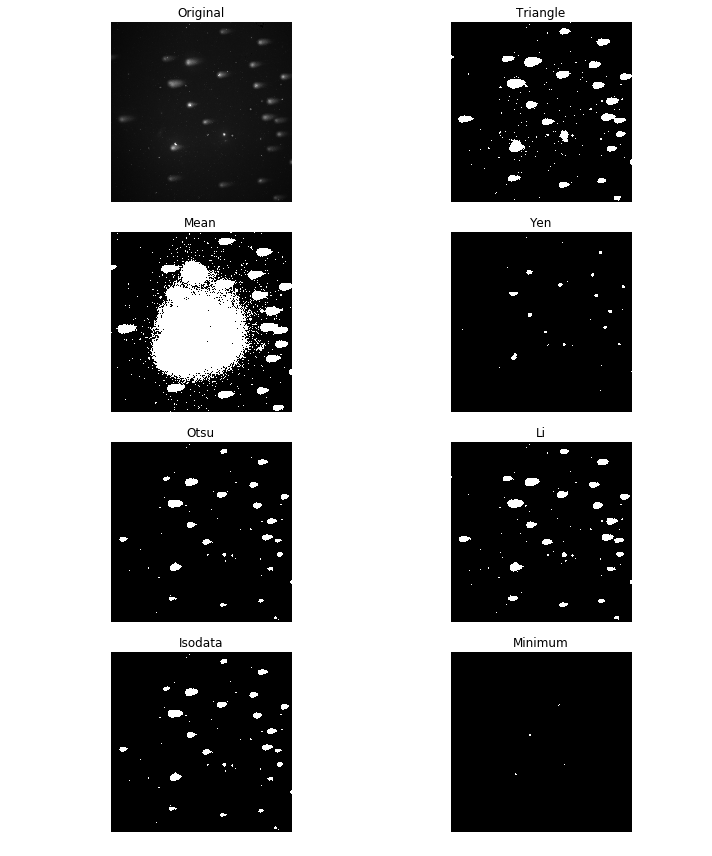

 
Date and time 2021-08-12 10:39:06.560175
Time since last check is 0:00:02.538745


In [9]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
fig, ax = try_all_threshold(imgArr, figsize=(10, 12), verbose=False)
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Interesting thresholds we would like to investigate further are: 
    * Triangle
    * Otsu
    * Li
    * Isodata
### Comapring them with the basic 'threshold at this value' method that is currently implemented

Date and time  2021-08-12 11:36:13.084391
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0012.bmp
min and max pixel values in imgArr are:  255.0 3.0
shape of imgThr is:  (2048, 2048)


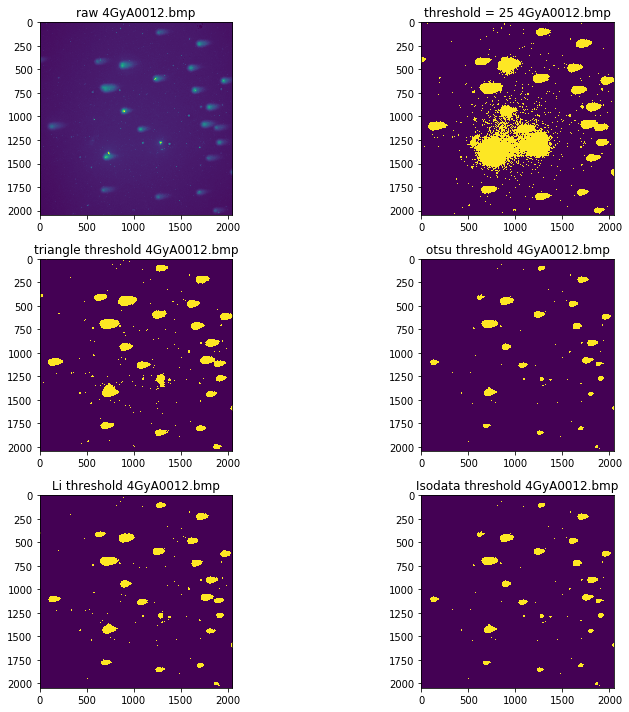

 
Date and time 2021-08-12 11:36:15.256308
Time since last check is 0:00:02.171917


In [43]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_otsu, threshold_li, threshold_isodata
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#imFile = "transformed4GyA0012.bmp"
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
maxPix = np.amax(imgArr)
minPix = np.amin(imgArr)
print("min and max pixel values in imgArr are: ", maxPix, minPix)
#apply basic threshold to image
thresh = 25
imgThr = np.zeros((nRows, nCols))
imgThr[:, :] = imgArr > thresh
print("shape of imgThr is: ", imgThr.shape)
#apply all the interesting thresholds
threshTri = threshold_triangle(imgArr)
imgTri= imgArr > threshTri

threshOtsu = threshold_otsu(imgArr)
imgOtsu= imgArr > threshOtsu

threshLi = threshold_li(imgArr)
imgLi= imgArr > threshLi

threshIso = threshold_isodata(imgArr)
imgIso= imgArr > threshIso
#
#plot raw image and with each of the different threshold to compare
fig = plt.figure(figsize=(12,10))
plt.subplot(3, 2, 1)
plt.title("raw " + fileName)
plt.imshow(imgRaw)
#
plt.subplot(3, 2, 2)
plt.title("threshold = " + str(thresh) + " " + fileName)
plt.imshow(imgThr)
#
plt.subplot(3, 2, 3)
plt.title("triangle threshold " + fileName)
plt.imshow(imgTri)
#
plt.subplot(3, 2, 4)
plt.title("otsu threshold " + fileName)
plt.imshow(imgOtsu)
#
plt.subplot(3, 2, 5)
plt.title("Li threshold " + fileName)
plt.imshow(imgLi)
plt.subplot(3, 2, 6)
plt.title("Isodata threshold " + fileName)
plt.imshow(imgIso)
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the use of local (adaptive) thresholding with the Gaussian method for a range of block_size values

Date and time  2021-08-12 12:01:41.431413
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0012.bmp
blocksize is:  [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500.]


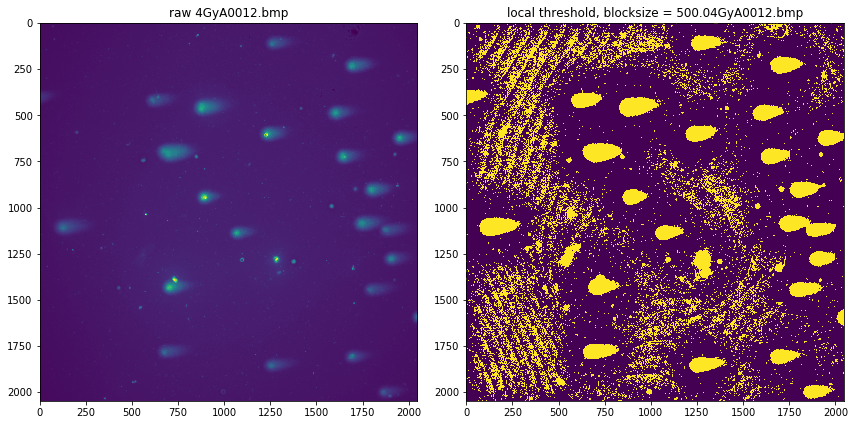

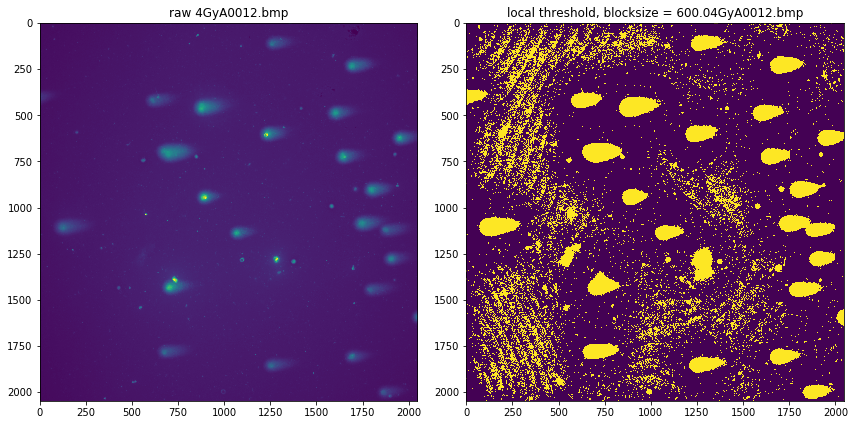

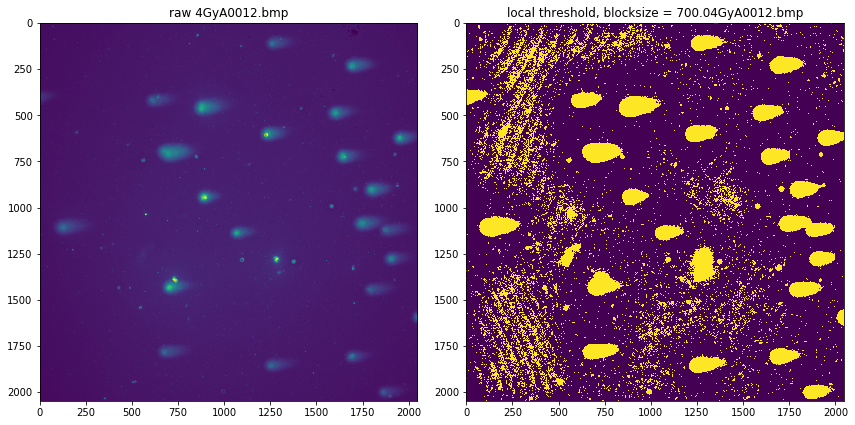

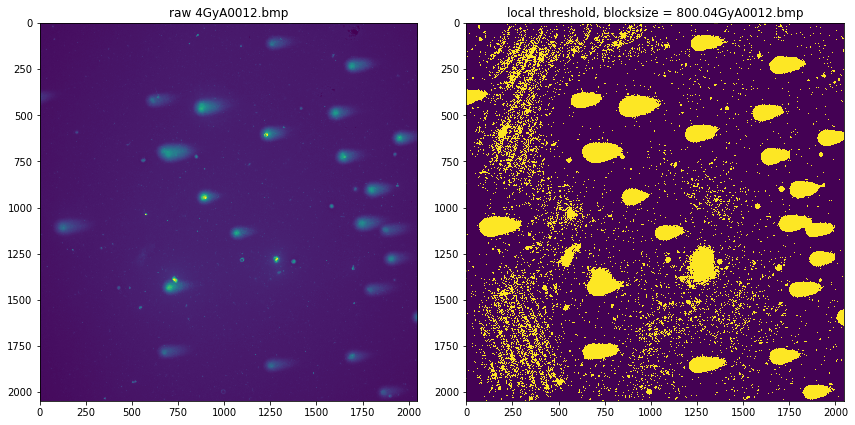

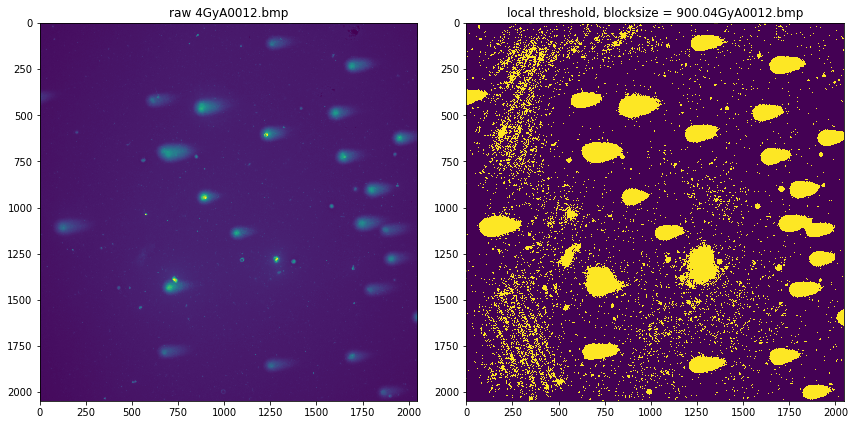

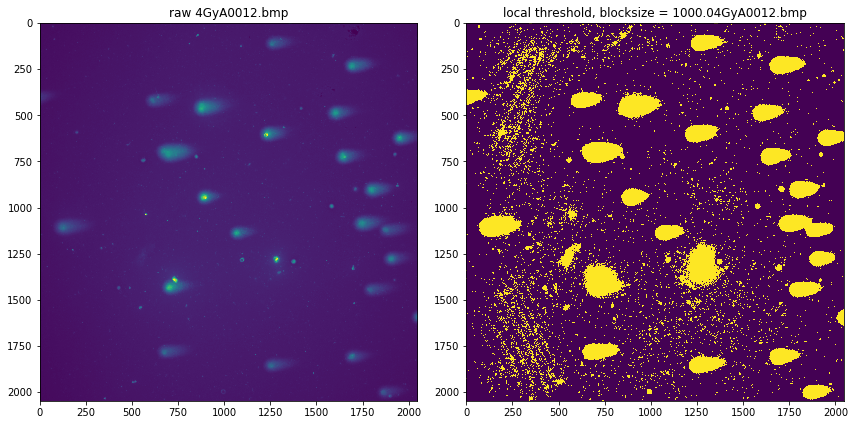

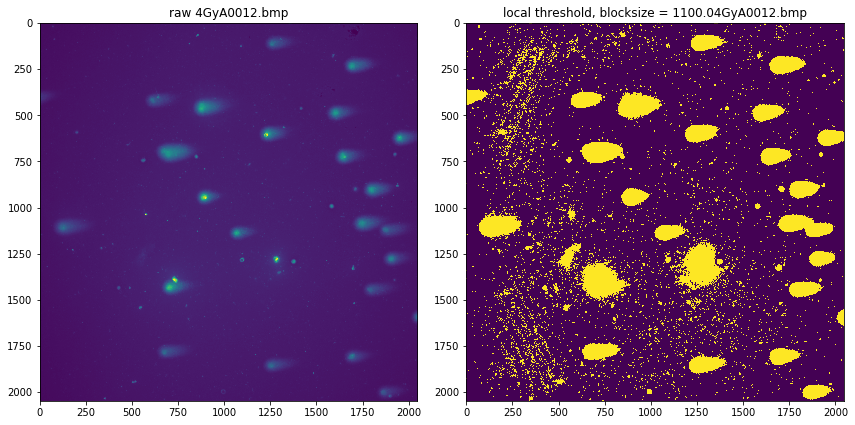

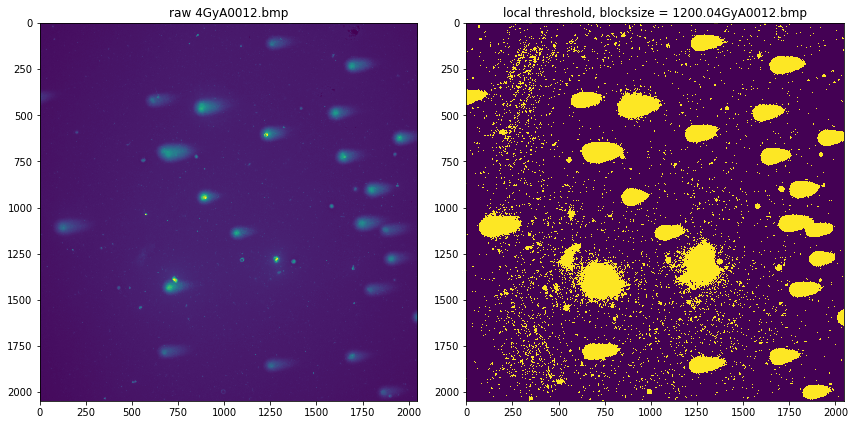

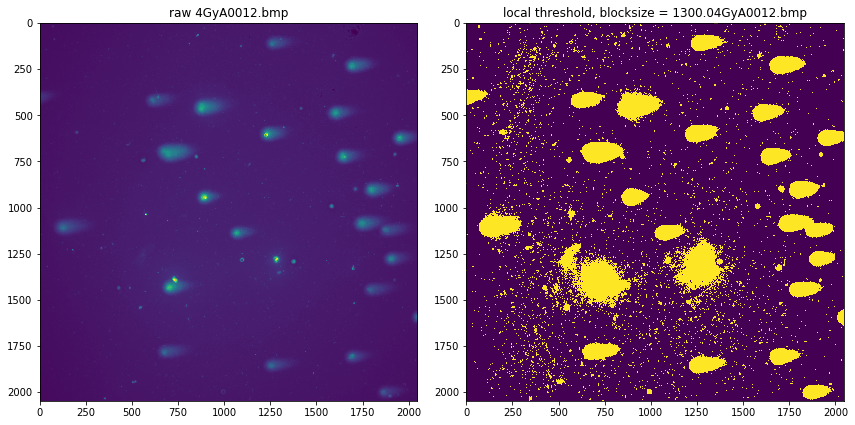

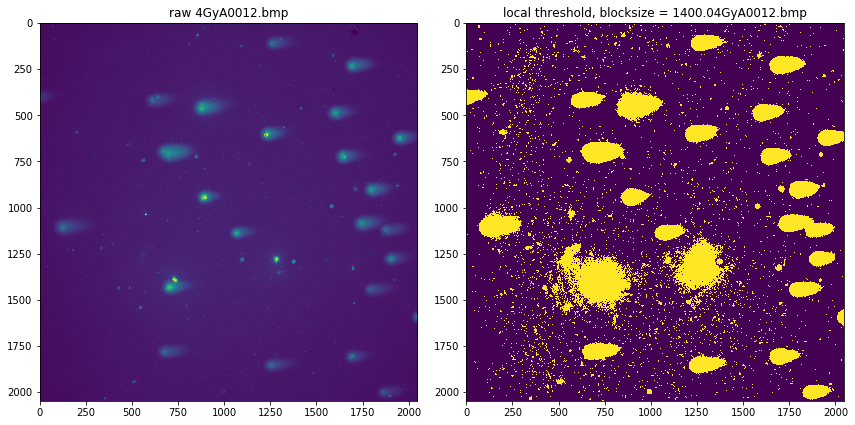

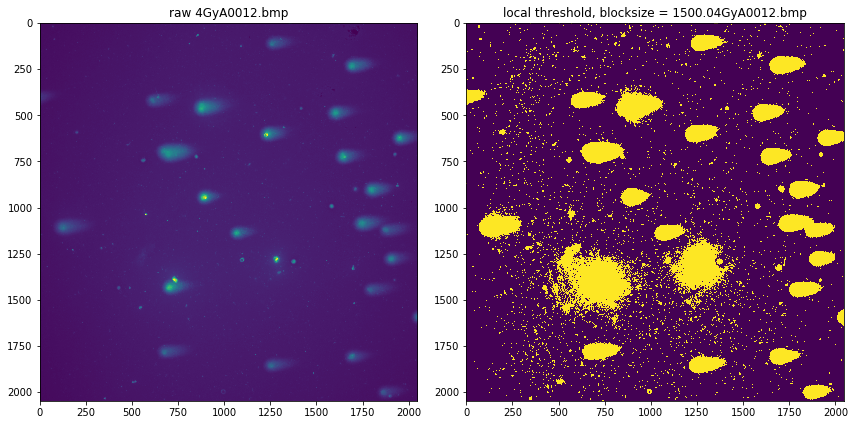

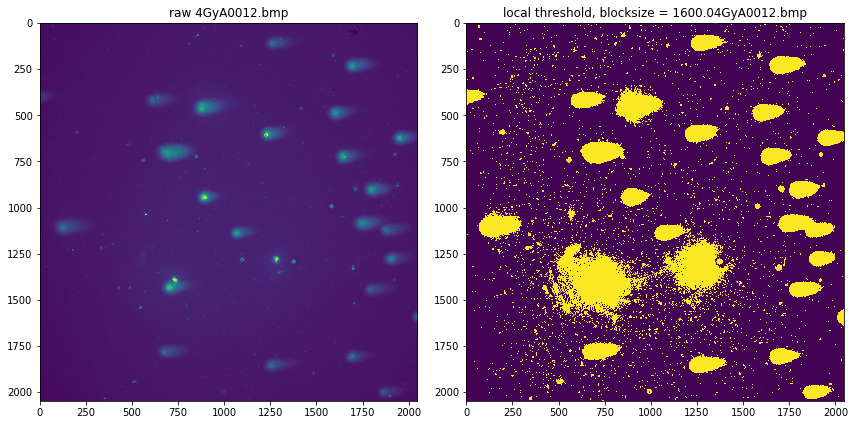

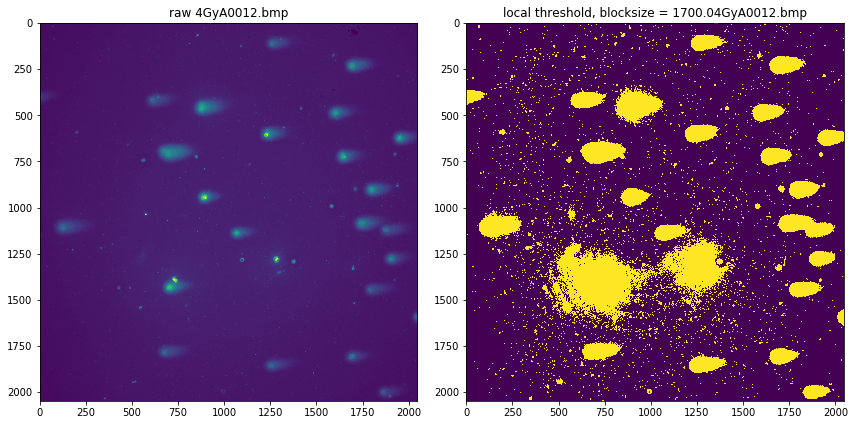

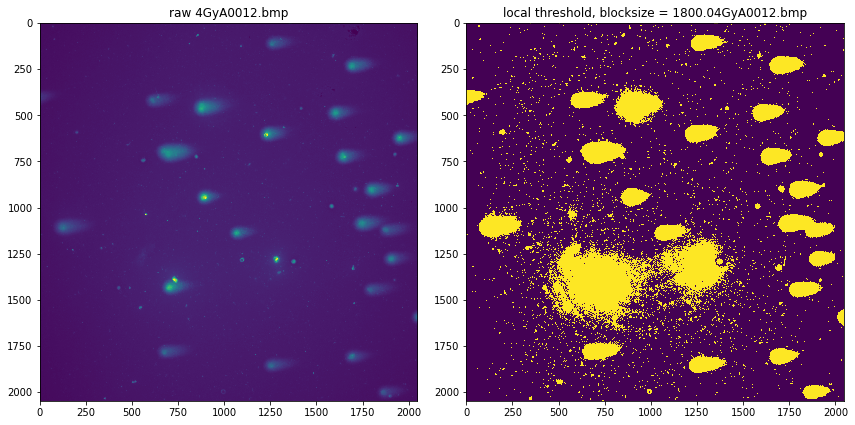

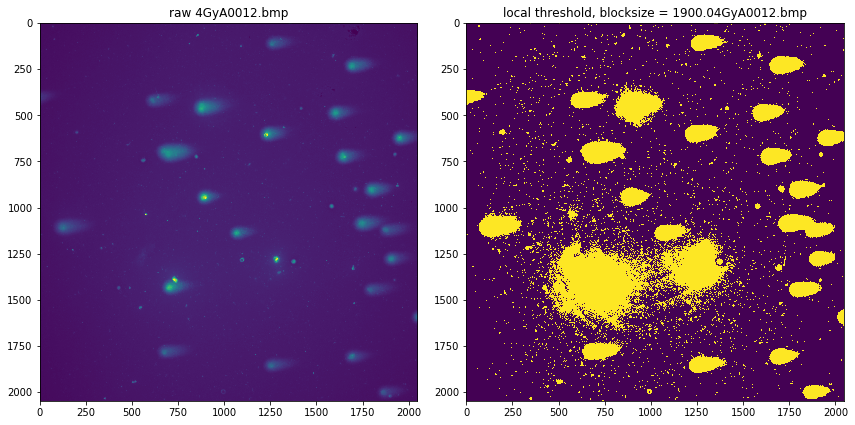

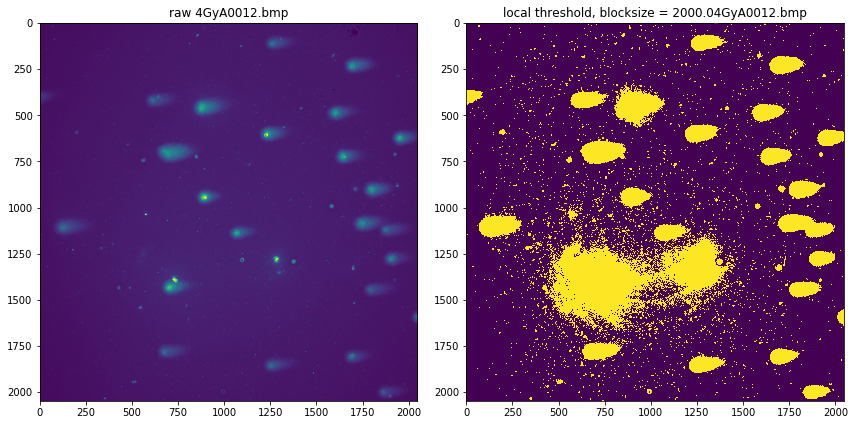

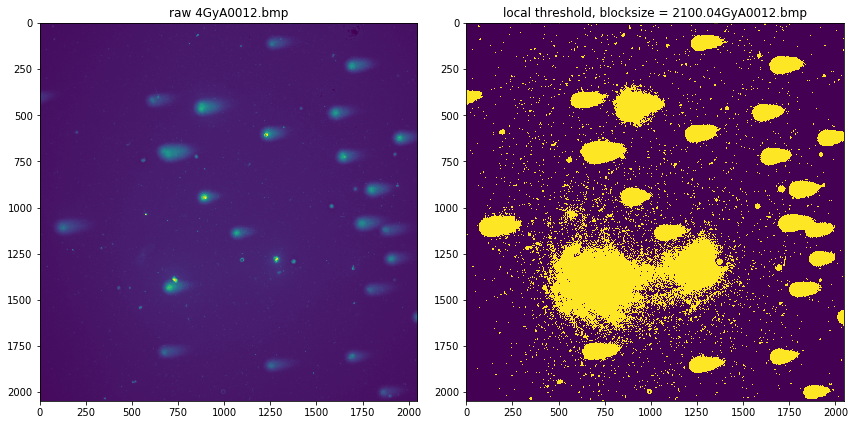

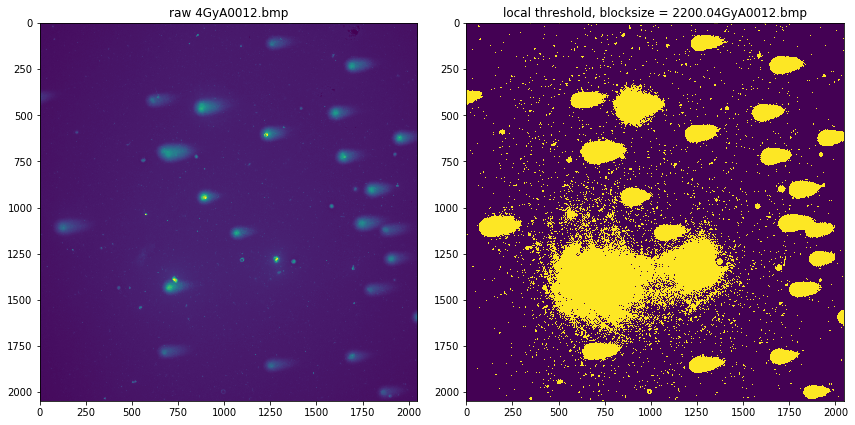

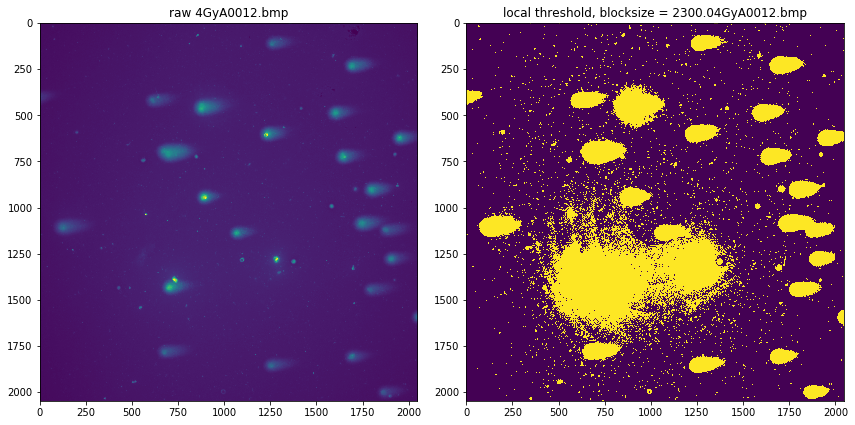

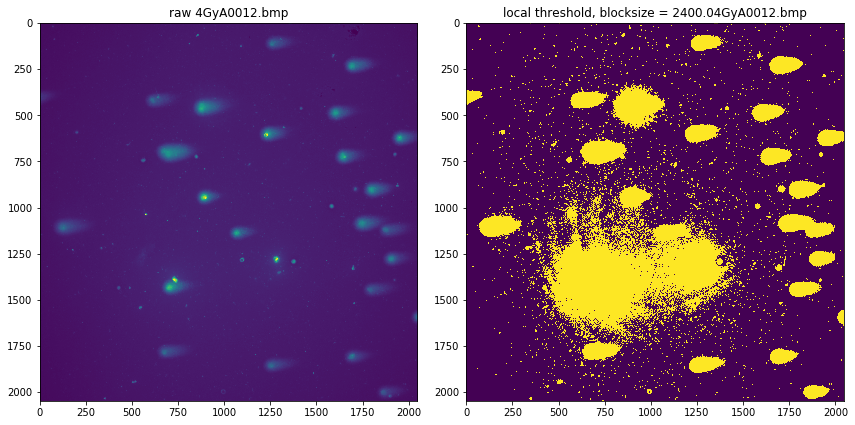

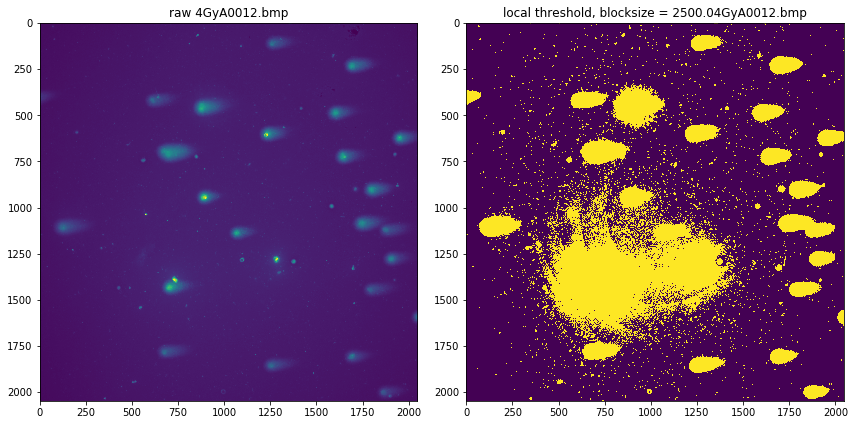

 
Date and time 2021-08-12 12:05:52.394039
Time since last check is 0:04:10.962626


In [59]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
# apply local threshold to imgArr
blocksize = np.linspace(500, 2500, 21)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocal = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'gaussian')
    imgLocal = imgArr > threshLocal
    #
    #plot raw and thresholded image
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(1, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(1, 2, 2)
    plt.title("local threshold, blocksize = " + str(blocksize[n]) + fileName)
    plt.imshow(imgLocal)
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the use of local (adaptive) thresholding with the Mean method for a range of block_size values¶

Date and time  2021-08-12 12:59:20.230305
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0012.bmp
blocksize is:  [ 500  600  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800
 1900 2000 2100 2200 2300 2400 2500]


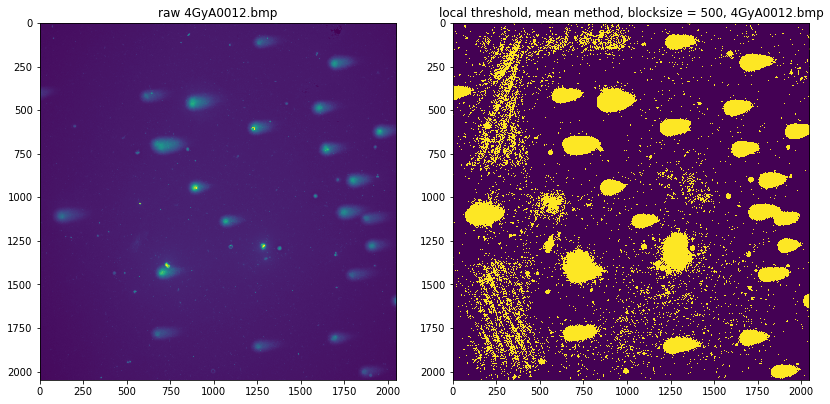

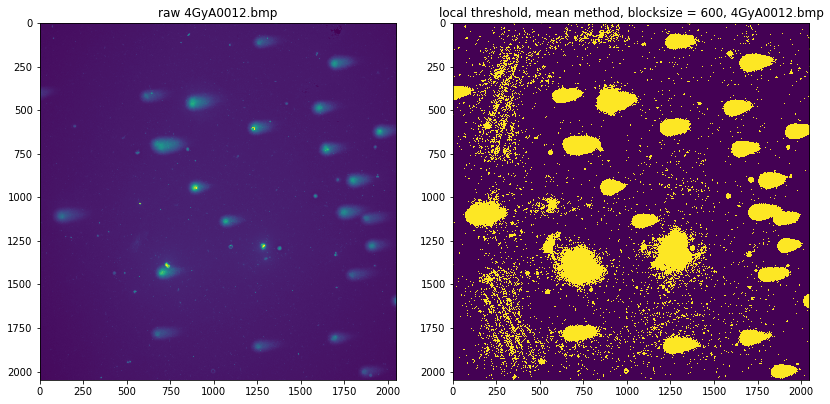

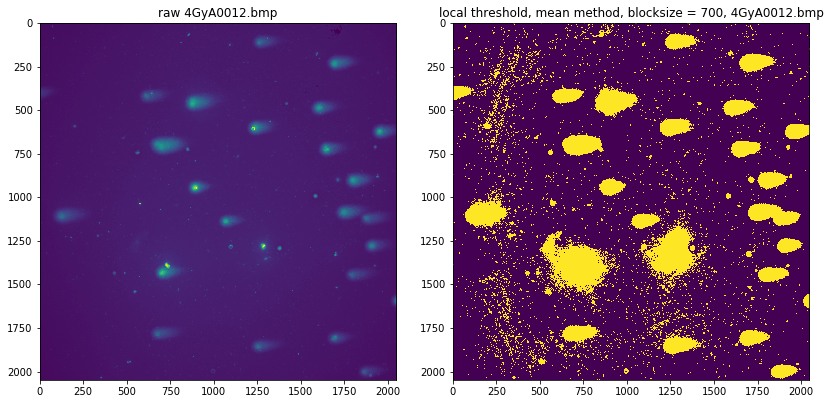

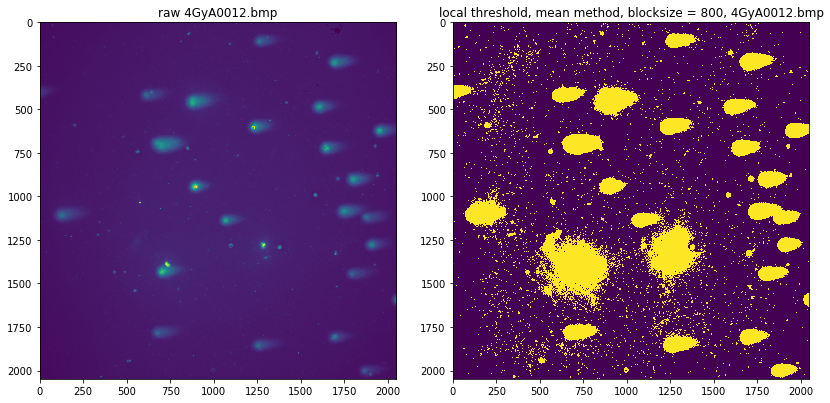

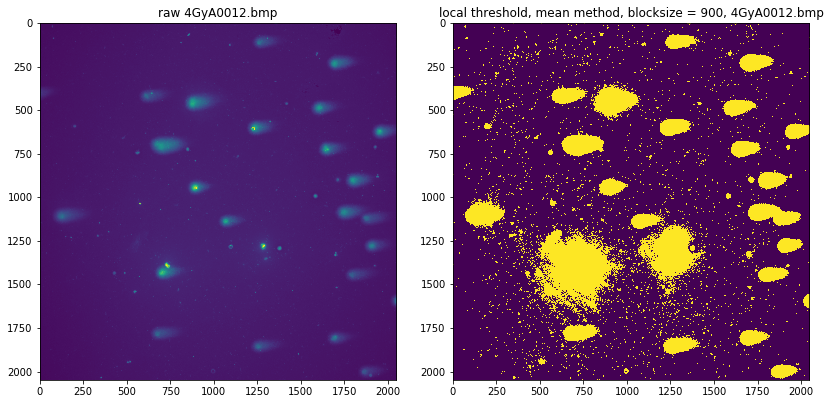

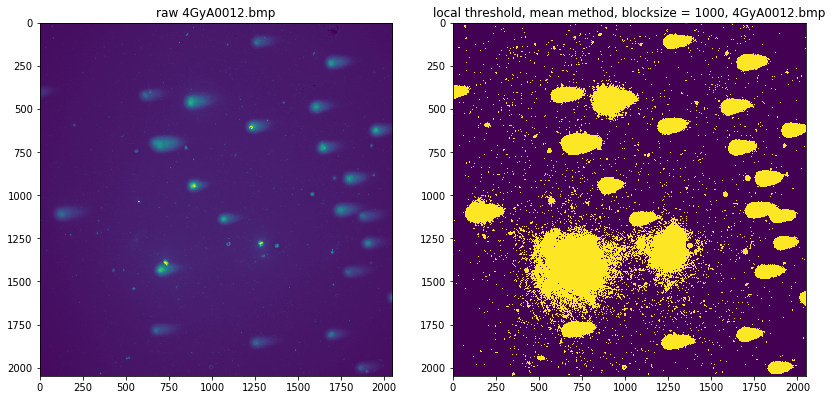

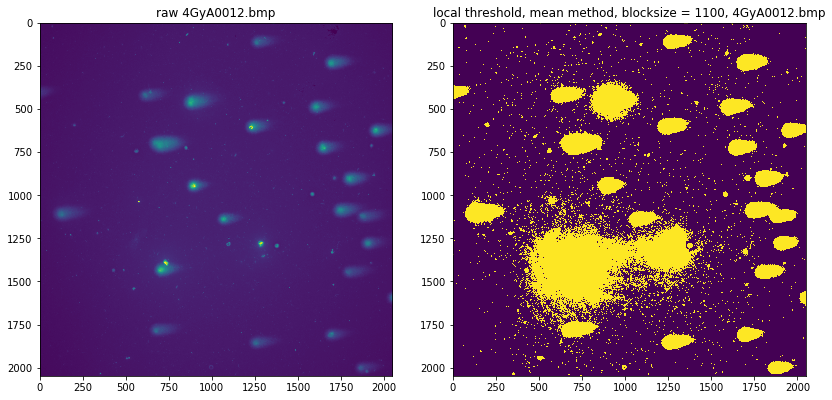

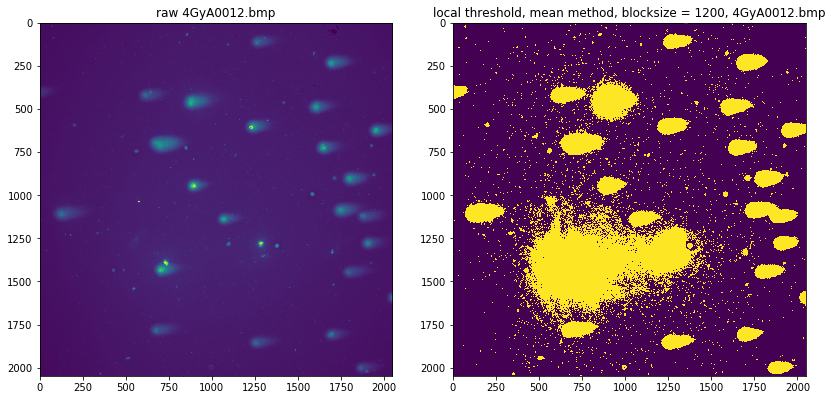

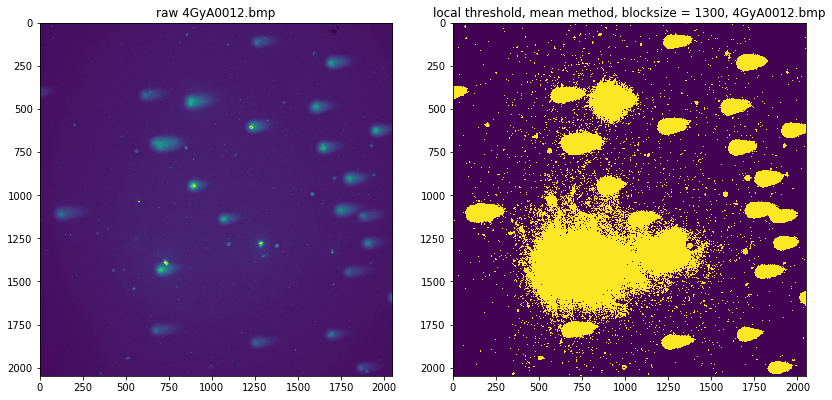

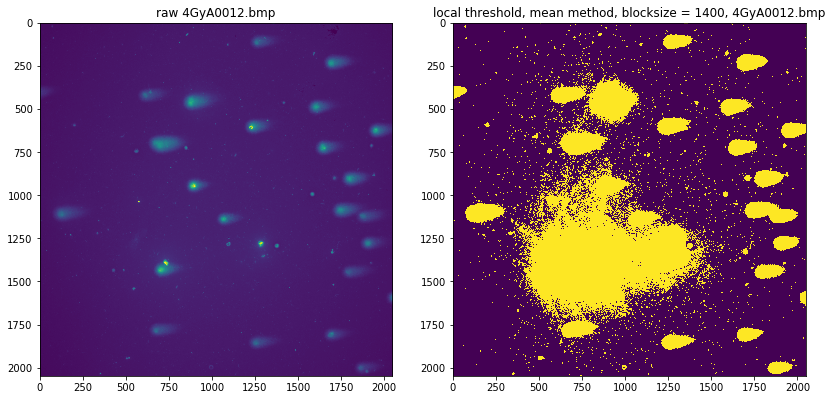

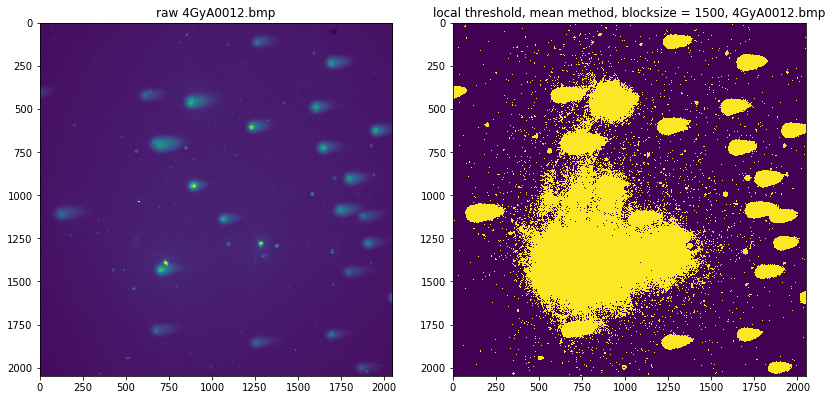

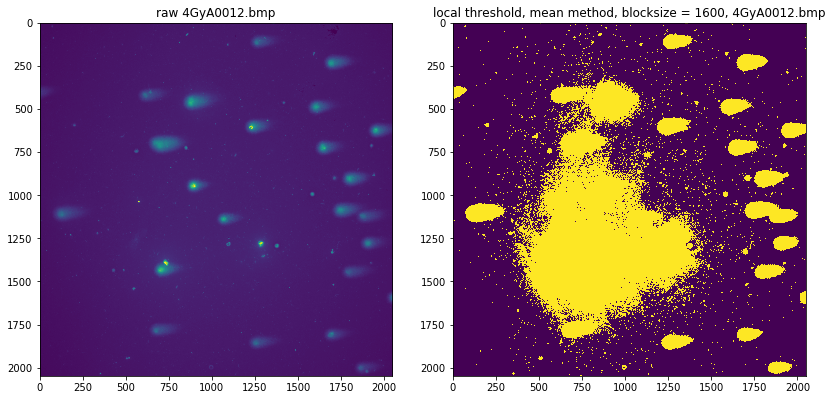

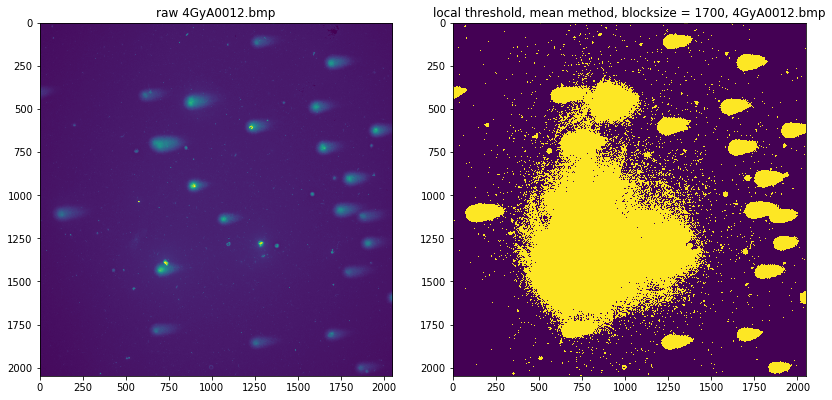

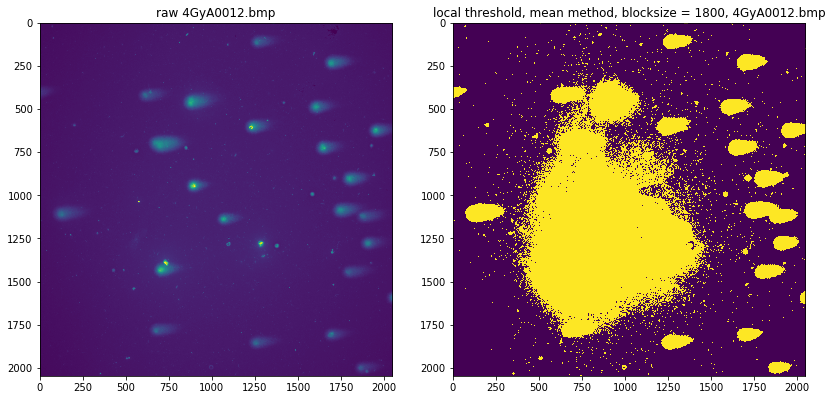

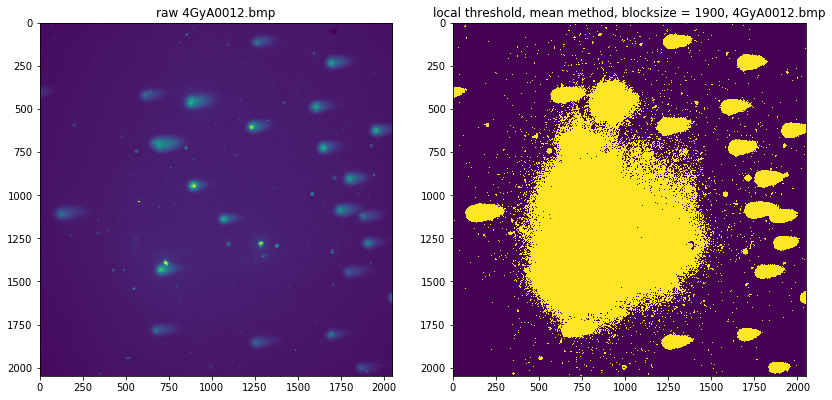

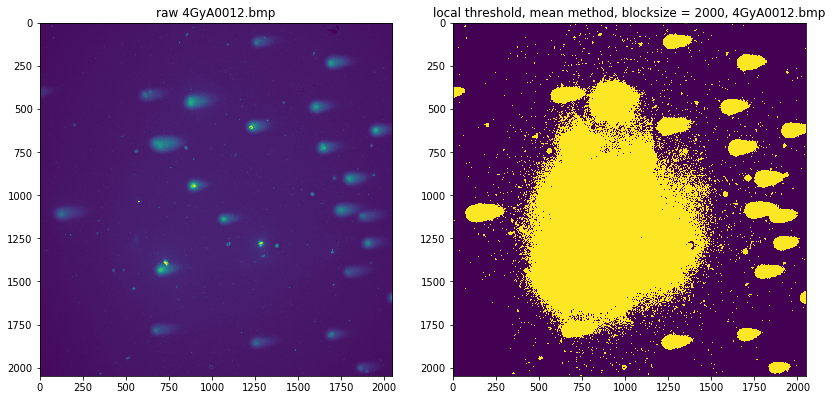

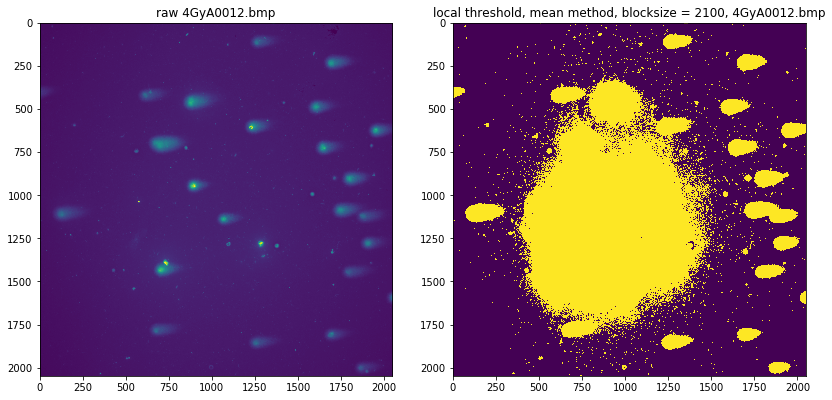

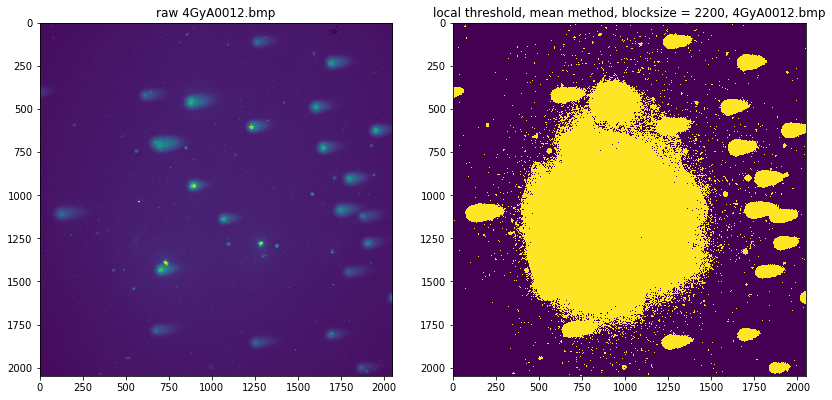

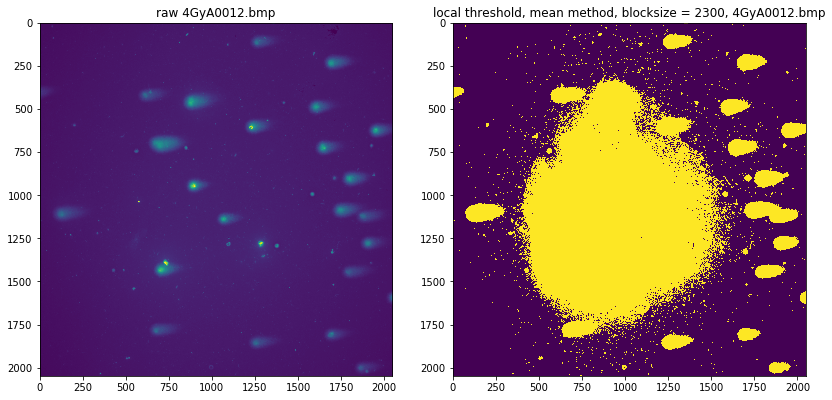

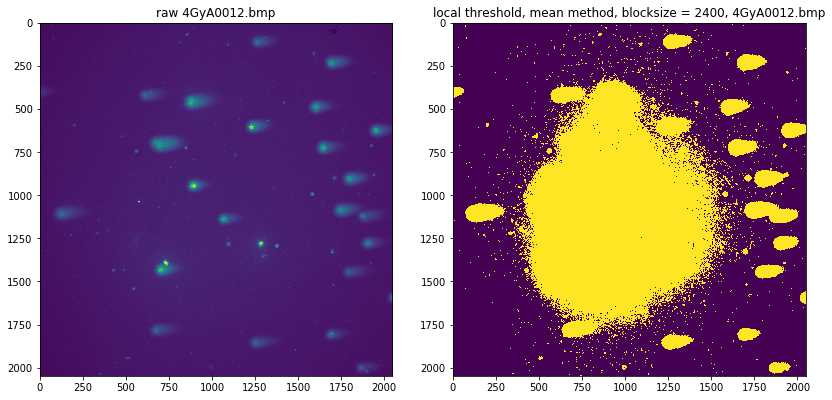

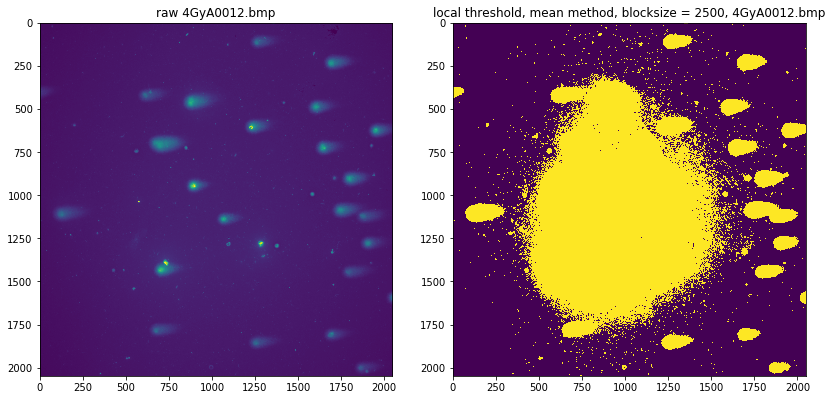

 
Date and time 2021-08-12 13:02:32.907181
Time since last check is 0:03:12.676876


In [65]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
# apply local threshold to imgArr
blocksize = np.linspace(500, 2500, 21).astype(int)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocal = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'mean')
    imgLocal = imgArr > threshLocal
    #
    #plot raw and thresholded image
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(1, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(1, 2, 2)
    plt.title("local threshold, mean method, blocksize = " + str(blocksize[n]) + ", " + fileName)
    plt.imshow(imgLocal)
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the difference in the method used for certain block_size values. 
### Possible methods available with the skimage threshold_local routine are:
    * Generic (set own function)
    * Gaussian (can set custom sigma)
    * Mean
    * Median

Date and time  2021-08-12 12:53:55.682693
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0012.bmp
blocksize is:  [1100. 1200. 1300. 1400. 1500.]


/home/selina/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


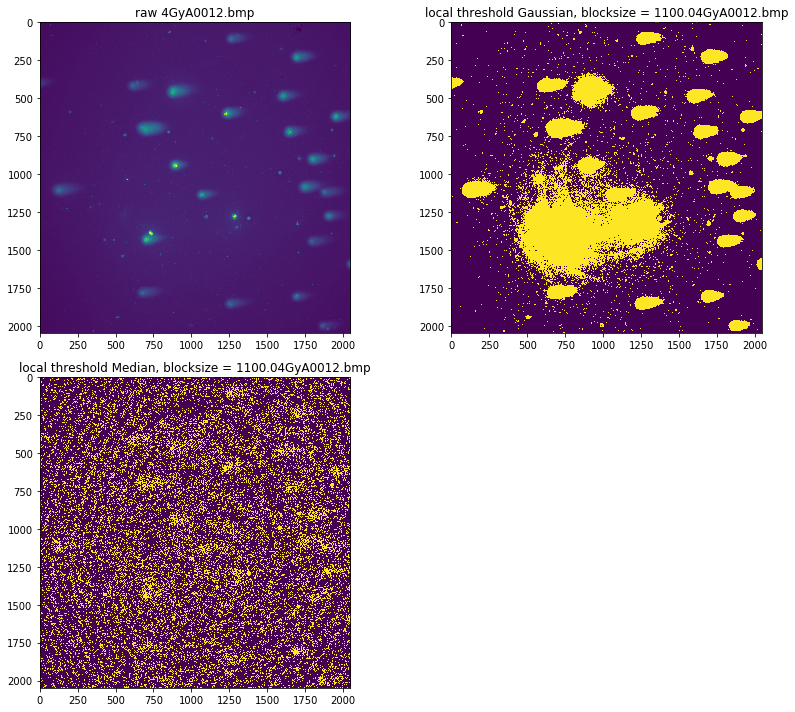

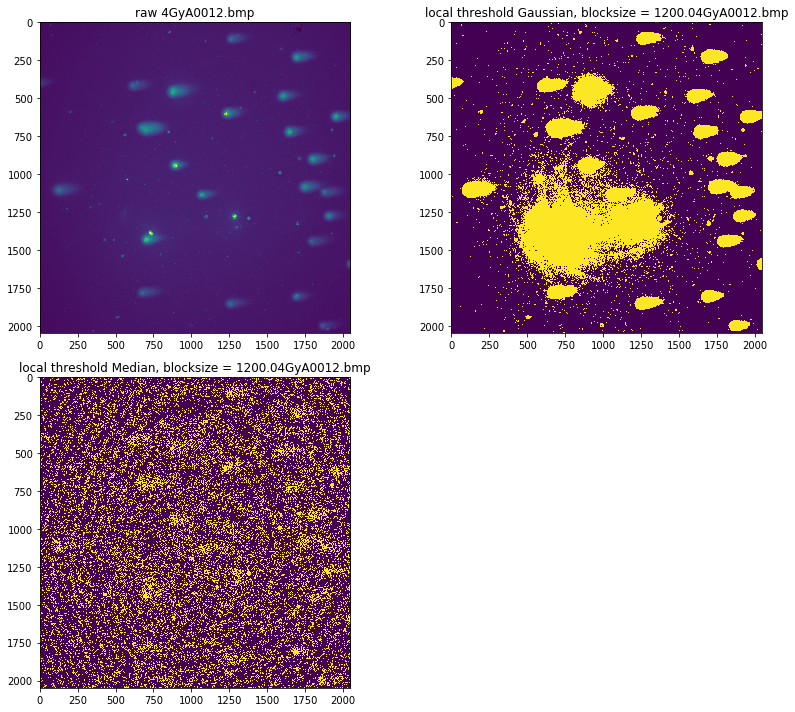

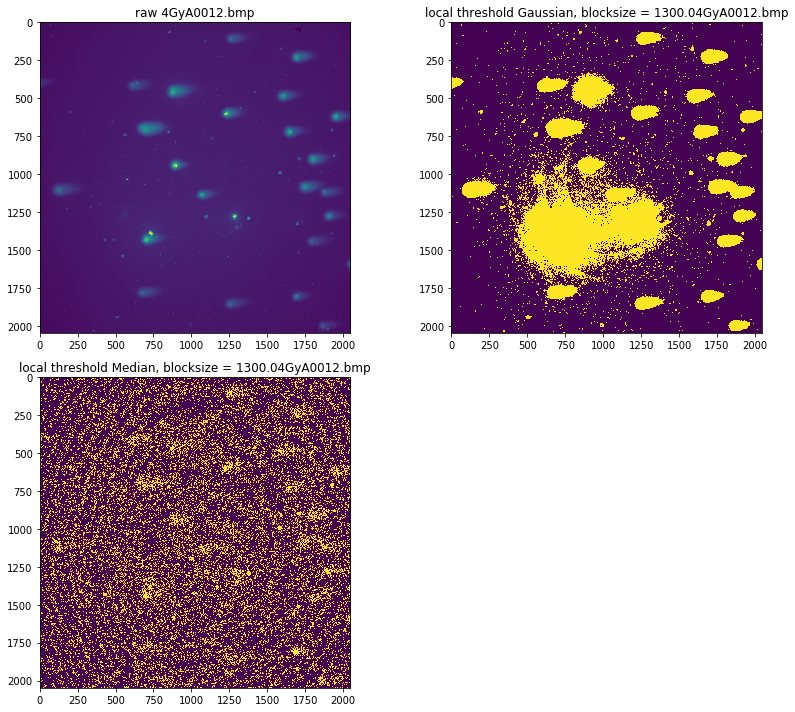

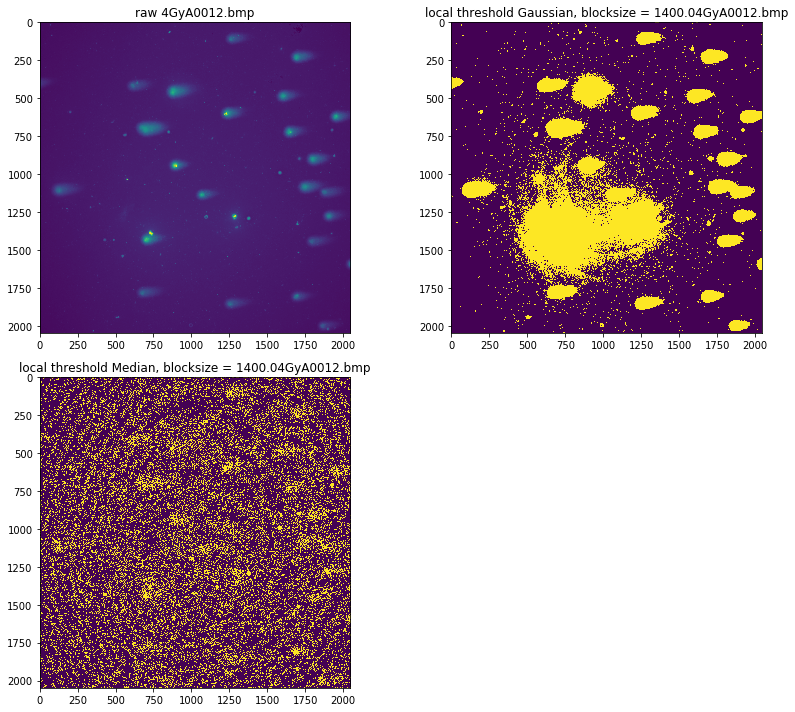

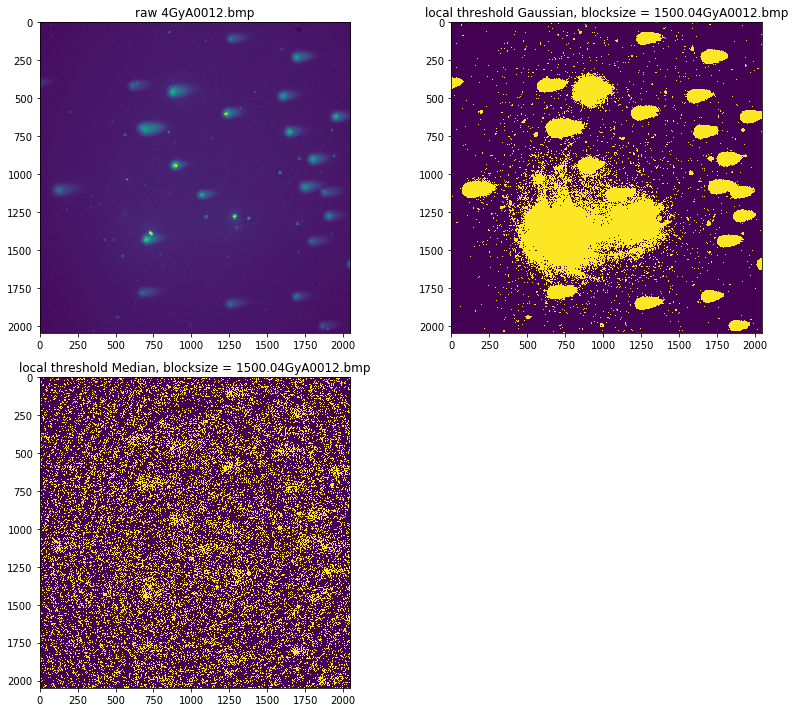

 
Date and time 2021-08-12 12:55:13.143002
Time since last check is 0:01:17.460309


In [63]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
# apply local threshold to imgArr
blocksize = np.linspace(1100, 1500, 5)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocalG = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'gaussian') #gaussian method
    imgLocal = imgArr > threshLocal
    #
    threshLocalMean = threshold_local(imgArr, block_size  = 10 +1, method = 'mean') #mean method
    imgLocalMean = imgArr > threshLocalMean
    #
    threshLocalMedian = threshold_local(imgArr, block_size  = 10 +1, method = 'median') #median method
    imgLocalMedian = imgArr > threshLocalMedian
    #
    #plot raw and thresholded images
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(2, 2, 2)
    plt.title("local threshold Gaussian, blocksize = " + str(blocksize[n]) + fileName)
    plt.imshow(imgLocal)
    #
    plt.subplot(2, 2, 3)
    plt.title("local threshold Mean, blocksize = " + str(blocksize[n]) + fileName)
    plt.imshow(imgLocalMean)
    #
    plt.subplot(2, 2, 3)
    plt.title("local threshold Median, blocksize = " + str(blocksize[n]) + fileName)
    plt.imshow(imgLocalMedian)
    #
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))